In [464]:
%matplotlib notebook

from modsim import *

In [465]:
m = UNITS.meters
s = UNITS.seconds

In [466]:
import random

In [467]:
condition = Condition(floorheight = 3,
                     num_floors = 1,
                     v_max = .762,
                     a_max = .65)

In [468]:
# 18 seconds for elevator to start, 9 to stop, 13 between floors

In [469]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [470]:
find_magic_num(condition.v_max, condition.a_max)

1.3399476923076923

In [471]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0, vy = 0)
    ts = linspace(0,32,100)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init,end_time = 0, finished = False, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [472]:
system = make_system(condition)
system.finished

False

In [473]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if (t < 18):
        return 0,0
    if(t > end_time):
        return 0,0
    if(height < y + magic_num):
        ay = -a_max 
        vy += ay
        #print(t)
    if(y> height):
        print(t , "finished")
        print(y)
        print(height)
        system.end_time = t
    if(vy > v_max):
        ay = 0
        vy = v_max
    
    return vy,ay

In [474]:
system.end_time = 1000
run_odeint(system, slope_func)

52.47805128704816 finished
15.0331635143
3.0
22.885209723436887 finished
3.75829087858
3.0


C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


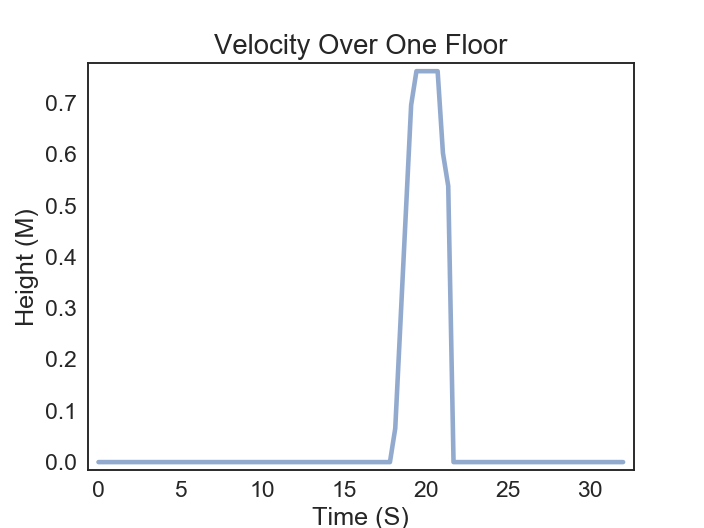

Saving figure to file velocity1


In [476]:
plot(system.results.vy)
system.height
title("Velocity Over One Floor")
xlabel("Time (S)")
ylabel("Height (M)")
savefig('velocity1')

<IPython.core.display.Javascript object>


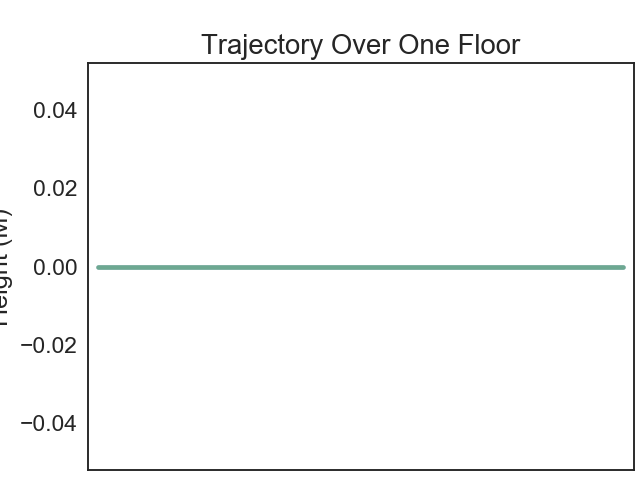

Saving figure to file velocity1


In [408]:
plot(system.results.vy)
system.height
title("Velocity Over One Floor")
xlabel("Time (S)")
ylabel("Velocity (m/s)")
savefig('velocity1')

In [244]:
floors = [0,1,2,3,4,10]

In [402]:
system.end_time

22.66687323821608

In [246]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        if(floors[i] != floors[i+1]):
            condition = Condition(floorheight = 3 *m,
                     num_floors = floors[i+1] - floors[i],
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
            system = make_system(condition)
            run_odeint(system,slope_func)
            total_time += system.end_time + 13
    total_time += 14
    return total_time
        

In [247]:
def sweep_basic_floors(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        condition = Condition(floorheight = 3 *m,
                     num_floors = i,
                     v_max = .762 * m / s,
                     a_max = .65 * m / s ** 2)
        system = make_system(condition)
        run_odeint(system,slope_func)
        sweep[i + 1] = system.end_time + 27
    return sweep

In [248]:
sweep = sweep_basic_floors(10)

In [249]:
def sweep_3_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [250]:
def sweep_7_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [251]:
sweep2 = sweep_3_people(10)

In [252]:
print(sweep)

0      0.000000
1     79.083792
2     79.083792
3     79.083792
4     79.083792
5     79.083792
6     27.000000
7     27.000000
8     27.000000
9     27.000000
10    27.000000
dtype: float64


In [253]:
def walking(max):
    sweep = SweepSeries()
    for i in range(max + 1):
        sweep[i] = 18.75* i
    return sweep

In [254]:
sweep = sweep_basic_floors(5)
sweep2 = sweep_3_people(5)
sweep3 = walking(5)
sweep4 = sweep_7_people(5)
plot(sweep)
plot(sweep2)
plot(sweep3)
plot(sweep4)